In [1]:
import os
from osgeo import ogr

import matplotlib.pyplot as plt

## Working with points

### Single points

In [2]:
# Create the firepit point.
point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(59.5, 11.5)

In [3]:
# Try out GetX and GetY.
x, y = point.GetX(), point.GetY()
print('{}, {}'.format(x, y))

59.5, 11.5


In [4]:
def _get_point_coords( geom):
        """Get point coordinates as an (x, y) tuple."""
        return (geom.GetX(), geom.GetY())

In [5]:
def plot_point(geom, style):
    data = _get_point_coords(point)
    plt.plot(data[0], data[1], style);

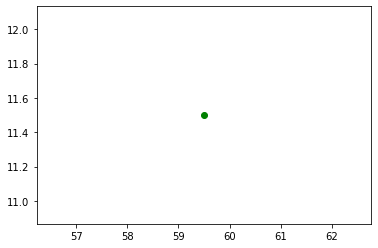

In [6]:
plot_point(point, 'go')

In [7]:
# Edit the point coordinates.
point.AddPoint(59.5, 13)
print(point)

POINT (59.5 13.0 0)


In [8]:
# Or edit the point using SetPoint instead of AddPoint.
point.SetPoint(0, 10, 15)
print(point)

POINT (10 15 0)


In [9]:
# Make a 2.5D point.
point = ogr.Geometry(ogr.wkbPoint25D)
point.AddPoint(59.5, 11.5, 2)
print(point)

POINT (59.5 11.5 2)


### Multiple points

In [10]:
# Create the multipoint 
points = ogr.Geometry(ogr.wkbMultiPoint)

point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(67.5, 16)
points.AddGeometry(point)

point.AddPoint(73, 31)
points.AddGeometry(point)

point.AddPoint(91, 24.5)
points.AddGeometry(point)

0

In [11]:
print(points)

MULTIPOINT (67.5 16.0 0,73 31 0,91.0 24.5 0)


In [12]:
def _get_multipoint_coords(geom):
        """Get multipoint coordinates as a list of (x, y) tuples."""
        coords = []
        for i in range(geom.GetGeometryCount()):
            coords.append(_get_point_coords(geom.GetGeometryRef(i)))
        return coords

In [13]:
data = _get_multipoint_coords(points)
data

[(67.5, 16.0), (73.0, 31.0), (91.0, 24.5)]

In [14]:
def plot_points(geom):
    for point in data:
        #x, y = zip(*point)
        x = point[0]
        y = point[1]
        plt.plot(x,y, 'bo')

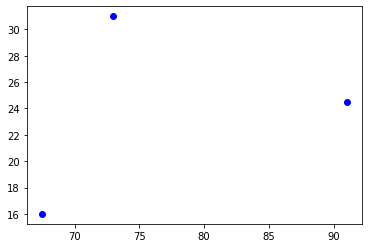

In [15]:
plot_points(points)

In [16]:
# Edit the coordinates for the second faucet.
points.GetGeometryRef(1).AddPoint(75, 32)
print(points)

MULTIPOINT (67.5 16.0 0,75 32 0,91.0 24.5 0)


In [17]:
# Move all points two units to the east
for i in range(points.GetGeometryCount()):
    pt = points.GetGeometryRef(i)
    pt.AddPoint(pt.GetX() + 10, pt.GetY() - 10)

In [18]:
print(points)

MULTIPOINT (77.5 6.0 0,85 22 0,101.0 14.5 0)


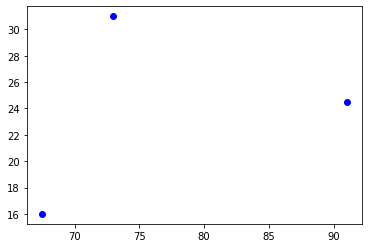

In [19]:
plot_points(points)

## Working with lines

### Single lines

In [20]:
# Create a line. Make sure to add the vertices in order.
line = ogr.Geometry(ogr.wkbLineString)
line.AddPoint(54, 37)
#line.AddPoint(62, 35.5)
line.AddPoint(70.5, 38)
line.AddPoint(74.5, 41.5)
print(line)

LINESTRING (54 37 0,70.5 38.0 0,74.5 41.5 0)


In [21]:
def _get_line_coords(geom):
        """Get line coordinates as a list of (x, y) tuples."""
        return [coords[:2] for coords in geom.GetPoints()]

In [22]:
def plot_line(geom):
    data = _get_line_coords(geom)
    
    x, y = zip(*data)
    plt.plot(x, y, 'b-');

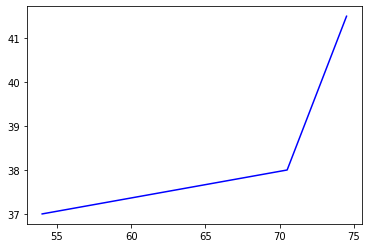

In [65]:
plot_line(line)

In [25]:
# Change the last vertex.
line.SetPoint(2, -16, 41.5)
print(line)

LINESTRING (54 37 0,70.5 38.0 0,-16 41.5 0,76.0 41.5 0)


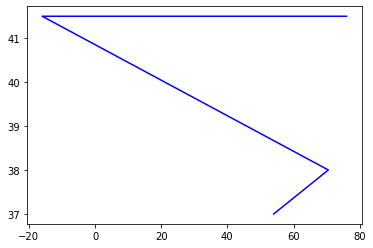

In [26]:
plot_line(line)

In [67]:
# Move the line one unit to the north.
for i in range(line.GetPointCount()):
    line.SetPoint(i, line.GetX(i), line.GetY(i) + 1)
print(line)

LINESTRING (54 38 0,70.5 39.0 0,74.5 42.5 0)


In [68]:
# Try out GetGeometryCount to prove it that it returns zero for a single
# geometry.
print(line.GetPointCount()) # vertices
print(line.GetGeometryCount()) # sub-geometries

3
0


In [69]:
# Look at the list of tuples containing vertex coordinates.
print(line.GetPoints())

# Insert a new vertex between the 2nd and 3rd vertices.
vertices = line.GetPoints()
vertices[2:2] = [(66.5, 35)]
print(vertices)


[(54.0, 38.0, 0.0), (70.5, 39.0, 0.0), (74.5, 42.5, 0.0)]
[(54.0, 38.0, 0.0), (70.5, 39.0, 0.0), (66.5, 35), (74.5, 42.5, 0.0)]


In [ ]:
# Create a new line geometry from the list of vertices.
new_line = ogr.Geometry(ogr.wkbLineString)
for vertex in vertices:
    new_line.AddPoint(*vertex)

print(new_line)

### The Python *  -operator

In [ ]:
pt = ogr.Geometry(ogr.wkbPoint)
vertex = (10, 20)

# Resolves to pt.AddPoint(10, 20), which works
pt.AddPoint(*vertex)

# Resolves to pt.AddPoint((10, 20)), which fails because only one thing
# (a tuple) is getting passed to AddPoint.
pt.AddPoint(vertex)

### Multiple lines 

In [ ]:
# Create the pathways multiline. Create three individual lines, one for each
# path. Then add them all to the multiline geometry.
path1 = ogr.Geometry(ogr.wkbLineString)
path1.AddPoint(61.5, 29)
path1.AddPoint(63, 20)
path1.AddPoint(62.5, 16)
path1.AddPoint(60, 13)

path2 = ogr.Geometry(ogr.wkbLineString)
path2.AddPoint(60.5, 12)
path2.AddPoint(68.5, 13.5)

path3 = ogr.Geometry(ogr.wkbLineString)
path3.AddPoint(69.5, 33)
path3.AddPoint(80, 33)
path3.AddPoint(86.5, 22.5)

paths = ogr.Geometry(ogr.wkbMultiLineString)
paths.AddGeometry(path1)
paths.AddGeometry(path2)
paths.AddGeometry(path3)

# Take a look at the multiline.
print(paths)

In [ ]:
# Edit the second vertex in the first path.
paths.GetGeometryRef(0).SetPoint(1, 63, 22)
print(paths)

In [ ]:
def _get_multiline_coords(geom):
        """Get multiline coordinates as a list of lists of (x, y) tuples."""
        coords = []
        for i in range(geom.GetGeometryCount()):
            coords.append(_get_line_coords(geom.GetGeometryRef(i)))
        return coords

In [ ]:
data = _get_multiline_coords(paths)

In [ ]:
for line in data:
    x, y = zip(*line)
    plt.plot(x, y, 'b-')

In [ ]:
# Move the line two units east and three south. Get each individual path from
# the multipath with GetGeometryRef, and then edit the vertices for the path.
for i in range(paths.GetGeometryCount()):
    path = paths.GetGeometryRef(i)
    for j in range(path.GetPointCount()):
        path.SetPoint(j, path.GetX(j) + 2, path.GetY(j) - 3)
print(paths)

## Working with polygons

### Single polygons

In [ ]:
# Make the yard boundary polygon. Create a ring and add the vertices in order,
# and then add the ring to the polygon.
ring = ogr.Geometry(ogr.wkbLinearRing)
ring.AddPoint(58, 38.5)
ring.AddPoint(53, 6)
ring.AddPoint(99.5, 19)
ring.AddPoint(73, 42)
yard = ogr.Geometry(ogr.wkbPolygon)
yard.AddGeometry(ring)
yard.CloseRings()

In [ ]:
# Take a look at the polygon
print(yard)

In [ ]:
def _get_polygon_coords(geom):
        """Get polygon coordinates as a list of lists of (x, y) tuples."""
        coords = []
        for i in range(geom.GetGeometryCount()):
            coords.append(_get_line_coords(geom.GetGeometryRef(i)))
        return coords

In [ ]:
coords = _get_polygon_coords(yard)
outer = coords[0]
x, y = zip(*outer)
plt.plot(x, y, 'r-')

In [ ]:
# Move the polygon five units west, by moving the ring.
ring = yard.GetGeometryRef(0)
for i in range(ring.GetPointCount()):
    ring.SetPoint(i, ring.GetX(i) - 5, ring.GetY(i))

In [ ]:
print(yard)

In [ ]:
# Cut off one of the sharp corners by replacing the third vertex with two other
# vertices.
ring = yard.GetGeometryRef(0)
vertices = ring.GetPoints()
vertices[2:3] = ((90, 16), (90, 27))
for i in range(len(vertices)):
    ring.SetPoint(i, *vertices[i])

In [ ]:
print(yard)

### Multiple polygons

In [ ]:
# Make the garden boxes multipolygon. Create a regular polygon for each raised
# bed, and then add it to the multipolygon. This is the code in listing 6.3.
box1 = ogr.Geometry(ogr.wkbLinearRing)
box1.AddPoint(87.5, 25.5)
box1.AddPoint(89, 25.5)
box1.AddPoint(89, 24)
box1.AddPoint(87.5, 24)
garden1 = ogr.Geometry(ogr.wkbPolygon)
garden1.AddGeometry(box1)

box2 = ogr.Geometry(ogr.wkbLinearRing)
box2.AddPoint(89, 23)
box2.AddPoint(92, 23)
box2.AddPoint(92,22)
box2.AddPoint(89,22)
garden2 = ogr.Geometry(ogr.wkbPolygon)
garden2.AddGeometry(box2)

gardens = ogr.Geometry(ogr.wkbMultiPolygon)
gardens.AddGeometry(garden1)
gardens.AddGeometry(garden2)
gardens.CloseRings()

In [ ]:
print(gardens)

In [ ]:
def _get_multipolygon_coords( geom):
        """Get multipolygon coordinates as a list of lists rings."""
        coords = []
        for i in range(geom.GetGeometryCount()):
            coords.append(_get_polygon_coords(geom.GetGeometryRef(i)))
        return coords

In [ ]:
data = _get_multipolygon_coords(gardens)

for poly in data:
    outer = poly[0]
    x, y = zip(*outer)
    plt.plot(x, y, 'r-')

In [ ]:
# Move the garden boxes on unit east and half a unit north. For each polygon
# contained in the multipolygon, get the ring and edit its vertices.
for i in range(gardens.GetGeometryCount()):
    ring = gardens.GetGeometryRef(i).GetGeometryRef(0)
    for j in range(ring.GetPointCount()):
        ring.SetPoint(j, ring.GetX(j) + 1, ring.GetY(j) + 0.5)

print(gardens)

### Polygons with holes

In [ ]:
# Make the yard multipolygon, but this time cut out a hole for the house.
# Make the outer boundary ring first (it's the same as earlier). Then make the
# ring for the house (hole). Then create a polygon and add the rings, making
# sure to add the outer boundary first. Close all of the rings at once by
# calling CloseRings *after* adding all of the rings.
lot = ogr.Geometry(ogr.wkbLinearRing)
lot.AddPoint(58, 38.5)
lot.AddPoint(53, 6)
lot.AddPoint(99.5, 19)
lot.AddPoint(73, 42)

house = ogr.Geometry(ogr.wkbLinearRing)
house.AddPoint(67.5, 29)
house.AddPoint(69, 25.5)
house.AddPoint(64, 23)
house.AddPoint(69, 15)
house.AddPoint(82.5, 22)
house.AddPoint(76, 31.5)

yard = ogr.Geometry(ogr.wkbPolygon)
yard.AddGeometry(lot)
yard.AddGeometry(house)
yard.CloseRings()

In [ ]:
print(gardens)

In [ ]:
# Move the yard five units south. Get each ring the same way you would get an
# inner polygon from a multipolygon.
for i in range(yard.GetGeometryCount()):
    ring = yard.GetGeometryRef(i)
    for j in range(ring.GetPointCount()):
        ring.SetPoint(j, ring.GetX(j) - 5, ring.GetY(j))

In [ ]:
print(gardens)